In [108]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [109]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004767,2019,1501402,Belém,15,PA,21,F,1,0,...,A,A,A,B,B,A,D,A,A,B
1,190001004985,2019,1502103,Cametá,15,PA,33,F,1,3,...,A,A,A,B,A,A,C,A,B,B
2,190001005075,2019,1500800,Ananindeua,15,PA,32,F,1,1,...,A,A,A,B,A,A,B,A,A,A
3,190001005080,2019,1501709,Bragança,15,PA,28,M,1,3,...,A,A,A,B,A,A,C,A,A,A
4,190001005108,2019,1506138,Redenção,15,PA,16,F,1,3,...,A,A,A,B,A,A,C,A,A,A
5,190001005181,2019,1503077,Garrafão do Norte,15,PA,15,F,1,3,...,A,A,A,B,B,A,B,A,A,B
6,190001005264,2019,1500800,Ananindeua,15,PA,21,F,1,3,...,A,A,A,B,A,A,B,A,A,A
7,190001005762,2019,1501402,Belém,15,PA,19,F,1,1,...,A,A,A,B,A,A,B,A,A,A
8,190001006031,2019,1503804,Jacundá,15,PA,18,F,1,4,...,A,A,A,B,A,A,C,A,A,A
9,190001006159,2019,1501402,Belém,15,PA,17,F,1,1,...,B,A,A,C,A,B,D,A,A,B


In [111]:
df.isnull().sum()/df.shape[0]*100
df.dropna(inplace=True) #dropando valores nulos

In [112]:
mean = df['NU_IDADE'].mean()
print(mean) #média de idade das pessoas que fazem o ENEM

17.73884031293143


In [113]:
#Criando uma nova coluna "Média Geral"
df['media_geral'] = df[['NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_REDACAO']].sum(axis=1)/5

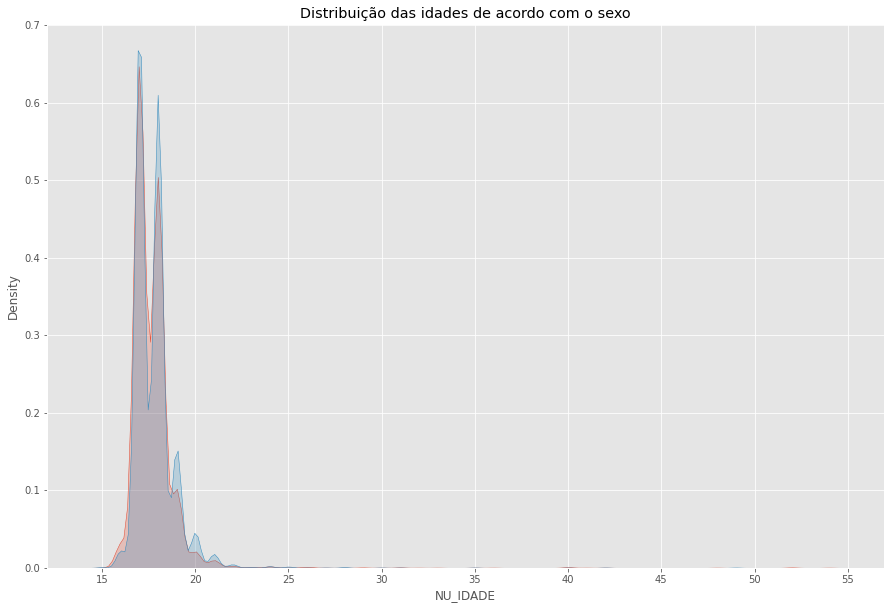

In [114]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.kdeplot(df.query("TP_SEXO == 'F'")['NU_IDADE'], ax=ax, shade=True, label='Idade Mulheres')
sns.kdeplot(df.query("TP_SEXO == 'M'")['NU_IDADE'], ax=ax, shade=True, label='Idade Homens') 
ax.set_title('Distribuição das idades de acordo com o sexo') # coloca titulo
plt.show()

## gráfico IDADE / SEXO

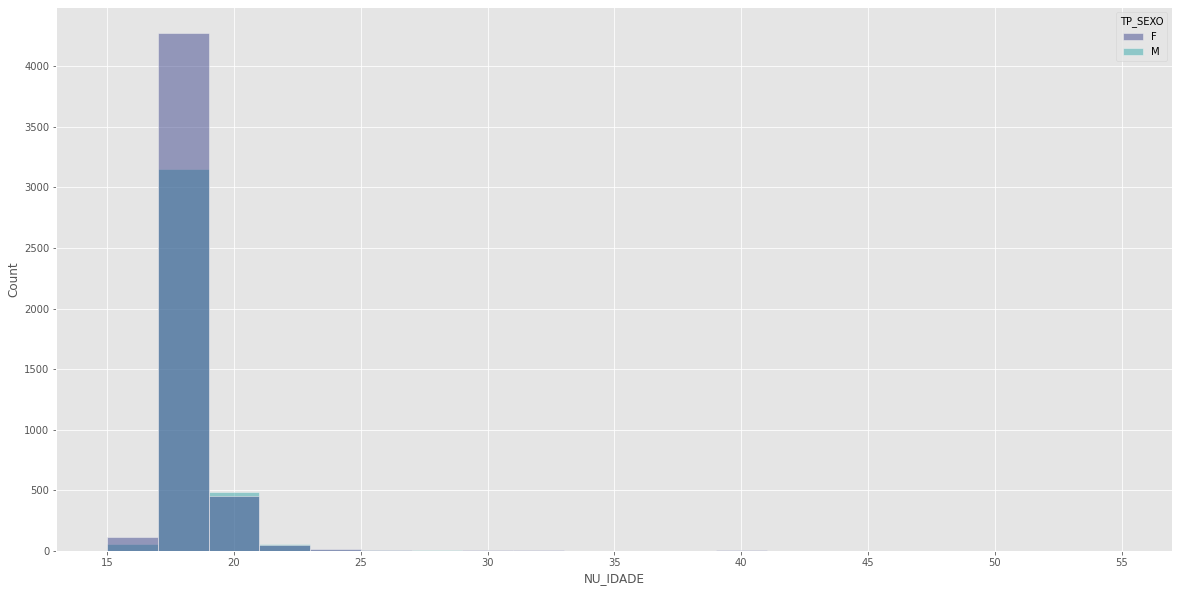

In [130]:
fig, ax = plt.subplots( figsize=(20, 10))
sns.histplot(
    data=df, x="NU_IDADE", hue="TP_SEXO",
   fill=True, common_norm=False, palette="mako",
   alpha=.5, binwidth=2,
)
plt.show()

## Separando os estados do Brasil por sua determinadas regiões

In [116]:
def REGIAO(x):
    if any((x =='MT',x=='MS',x=='GO',x=='DF')):
        return 'CENTRO-OESTE'
    if any((x=='AM',x=='PA',x=='AC',x=='RO',x=='RR',x=='AP',x=='TO')):
        return 'NORTE'
    if any((x=='MA',x=='PI',x=='CE',x=='RN',x=='PB',x=='PE',x=='AL',x=='SE',x=='BA')):
        return 'NORDESTE'
    if any((x=='MG',x=='SP',x=='RJ',x=='ES')):
        return 'SUDESTE'
    if any((x=='PR',x=='SC',x=='RS')):
        return 'SUL'


df['REGIAO'] = df['SG_UF_RESIDENCIA'].apply(REGIAO)

In [1]:
fig, ax = plt.subplots( figsize=(20, 10))
sns.countplot(
   data=df, x="TP_ESCOLA", hue="REGIAO",
   palette="mako",
   alpha=.5, linewidth=0,
)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fig, ax = plt.subplots( figsize=(20, 10))
sns.kdeplot(
   data=df, x="TP_SIT_FUNC_ESC", hue="REGIAO",
   fill=True, common_norm=False, palette="mako",
   alpha=.5, linewidth=0,
)
plt.show()

In [ ]:
df.query("REGIAO == 'NORDESTE'")

In [ ]:
fig, ax = plt.subplots( 3,2, figsize=(10, 20))
sns.countplot(
   data=df.query("REGIAO == 'NORDESTE'"), x="TP_SEXO", hue="REGIAO",
   palette="mako",
   alpha=.5, linewidth=0,
    ax=ax[0,0]
)


sns.countplot(
   data=df.query("REGIAO == 'SUDESTE'"), x="TP_SEXO", hue="REGIAO",
   palette="mako",
   alpha=.5, linewidth=0,
    ax=ax[0,1]
)
plt.show()

## Média geral por região

In [2]:
fig, ax = plt.subplots( figsize=(20, 10))
sns.kdeplot(
   data=df, x="media_geral", hue="REGIAO",
   palette="Paired", linewidth=2,
)
plt.show()
#Neste gráfico provavelmente foram pegos dados a mais de uma região do que de outra

NameError: name 'plt' is not defined

In [132]:
# substituindo
df['TP_COR_RACA']=df['TP_COR_RACA'].replace({0:'Não decladado',
                                             1:'Branca',
                                             2:'Preta',
                                             3:'Parda',
                                             4:'Amarela',
                                             5:'Indigena'})

In [133]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_geral,REGIAO
8,190001006031,2019,1503804,Jacundá,15,PA,18,F,1,Amarela,...,A,B,A,A,C,A,A,A,440.08,NORTE
9,190001006159,2019,1501402,Belém,15,PA,17,F,1,Branca,...,A,C,A,B,D,A,A,B,628.86,NORTE
13,190001006306,2019,1501402,Belém,15,PA,21,F,1,Parda,...,A,E,B,B,E,A,A,B,416.38,NORTE
16,190001006792,2019,1501808,Breves,15,PA,20,M,1,Preta,...,A,B,B,A,C,A,A,A,446.44,NORTE
25,190001007671,2019,1501402,Belém,15,PA,17,M,1,Branca,...,A,B,B,B,E,B,A,B,604.70,NORTE


## Analisando gráfico de notas por cor/raça

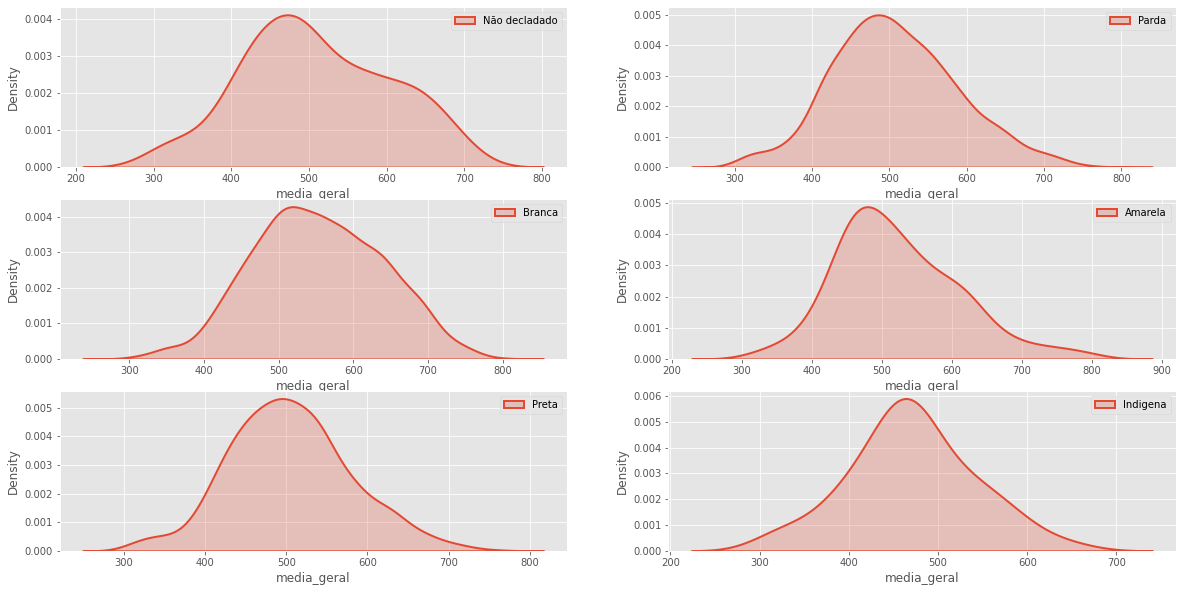

In [159]:
fig, ax = plt.subplots( 3,2, figsize=(20, 10))
racas = ['Não decladado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena']
for i in range(6):
    if i>=3:
        j = 1
    else:
        j = 0
    sns.kdeplot(
       data=df.query("TP_COR_RACA == @racas[@i]"), x="media_geral",
       palette="Paired", linewidth=2, label=racas[i],
        ax=ax[i%3,j],
        shade=True
    )
    ax[i%3,j].legend()
plt.show()